# **STAT 301 Group Project Final Report**


### **OVERVIEW FOR US AS WE WORK:**

**(1) Introduction**
Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal.
Formulate one or two questions for investigation and detail the dataset that will be utilized to address these questions.
Additionally, align your question/objectives with the existing literature. To contextualize your study, include a minimum of two scientific publications (these should be listed in the References section).

**(2) Methods and Results**

- **a) “Exploratory Data Analysis (EDA)”**
Demonstrate that the dataset can be read into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot to address your question.
Make sure to explore the association of the explanatory variables with the response.
Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.
Your EDA must be comprehensive with high quality plots.

- **b) “Methods: Plan”**
Describe in written English the methods you used to perform your analysis from beginning to end, and narrate the code that does the analysis.
If included, describe the “Feature Selection” process and how and why you choose the covariates of your final model.
Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
If inference is the aim of your project, a detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities (e.g., are the coefficients significant? How does the model fit the data)?
A careful model assessment must be conducted.
If prediction is the project's aim, describe the test data used or how it was created.
Ensure your tables and/or figures are labelled with a figure/table number.

**(3) Discussion**
In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

Summarize what you found and the implications/impact of your findings.
If relevant, discuss whether your results were what you expected to find.
Discuss how your model could be improved;
Discuss future questions/research this study could lead to.

**(4) References**
At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

# Introduction

***TODO: (check if I copy pasted this correctly form the google doc. I also manually took the descriptions of each var from kaggle -Macy)***

A GitHub repository is an efficient tool for code management and collaboration. Whether for personal learning, team development, or open-source projects, it is highly effective for both users and creators. In recent years, with the widespread adoption of the internet and the rise of the big data industry, the demand for repositories on GitHub has grown significantly. Understanding users' needs for repositories with different characteristics can help creators better align with user expectations and grasp industry trends, ultimately contributing to the long-term and sustainable development of the platform. Within this context, one measure of a repository's success and popularity is how many stars it accumulates on github. With the current domination of github in the tech space, developing methods to predict  or increase a repository's popularity with users can be essential. This brings us to the following research questions.

#### <br> Research questions:
- Which fundamental characteristics of a repository influence its popularity? 
- Can these fundamental characteristics effectively predict the popularity of a repository?

#### <br> Alignment with Existing Literature:
Previous research by Hudson Borges, Andre Hora, and Marco Tulio Valente (2016) in "Predicting the Popularity of GitHub Repositories" utilized multiple linear regression to analyze the factors influencing repository popularity. Similarly, in "Characterization and Prediction of Popular Projects on GitHub," Junxiao Han, Shuiguang Deng, Xin Xia, Dongjing Wang, and Jianwei Yin (2019) applied multiple linear regression to examine a different dataset. Despite the variation in data sources, both studies arrived at strikingly similar conclusions: the number of forks exhibits a strong positive correlation with the number of stars, establishing it as a significant predictor of repository popularity. In contrast, variables such as license type and repository creation time were found to have relatively minor impacts, underscoring the limited influence of these factors on the popularity of GitHub repositories. ***TODO (Is this a quote? Doesn't seem to be talking about our report)-->*** In our paper, we utilized different datasets, explored various input variables, and employed alternative model selection methods to investigate whether other variables could influence the popularity of repositories. In this way, the repository creators can get more comprehensive and accurate guidance to improve their repository’s popularity.

#### <br> Dataset:
To address our research questions, this study will utilize data from Kaggle. This data was collected through GitHub search API, and contains information on the top 215,000 Github repositories constrained to the repositories with over 167 stars. It includes the following 24 variables:
- `Name`:
    - The name of the GitHub repository
- `Description`:
    - A brief textual description that summarizes the purpose or focus of the repository
- `URL`:
    - The URL or web address that links to the GitHub repository, which is a unique identifier for the repository
- `Created.At`:
    - The date and time when the repository was initially created on GitHub, in ISO 8601 format
- `Updated.At`:
    - The date and time of the most recent update or modification to the repository, in ISO 8601 format
- `Homepage`:
    - The URL to the homepage or landing page associated with the repository, providing additional information or resources
- `Size`:
    - The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- `Stars`:
    - The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- `Forks`:
    - The number of times the repository has been forked by other GitHub users
- `Issues`:
    - The total number of open issues
- `Watchers`:
    - The number of GitHub users who are "watching" or monitoring the repository for updates and changes
- `Language`:
    - The primary programming language
- `License`:
    - Information about the software license using a license identifier
- `Topics`:
    - A list of topics or tags associated with the repository, helping users discover related projects and topics of interest
- `Has.Issues`:
    - A boolean value indicating whether the repository has an issue tracker enabled. In this case, it's true, meaning it has an issue tracker
- `Has.Projects`:
    - A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items
- `Has.Downloads`:
    - A boolean value indicating whether the repository offers downloadable files or assets to users
- `Has.Wiki`:
    - A boolean value indicating whether the repository has an associated wiki with additional documentation and information
- `Has.Pages`
    - A boolean value indicating whether the repository has GitHub Pages enabled, allowing the creation of a website associated with the repository
- `Has.Discussions`:
    - A boolean value indicating whether the repository has GitHub Discussions enabled, allowing community discussions and collaboration
- `Is.Fork`:
    - A boolean value indicating whether the repository is a fork of another repository. In this case, it's false, meaning it is not a fork
- `Is.Archived`:
    - A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained
- `Is.Template`:
    - A boolean value indicating whether the repository is set up as a template
- `Default.Branch`:
    - The name of the default branch
 
The selected dataset includes various variables indicating the basic characteristics of the repository. In order to explore the research question, we plan to use the number of stars which shows the popularity of the repositories as response variable and use different input variables including number of forks, number of issues, the size of the repository (in KB), whether Discussions, Wiki, Pages and Projects are enabled and whether repository is set up as a template to find a model with good prediction power. The reason why just chooses the important input variables is that some of the variables which demonstrate in the previous research in the selected dataset have little correlation with the popularity of a repository.
The dataset is very large, containing over 215,000 rows or observations (each corresponding to a repository), so we chose to take a simple random sample of size 1,000 to use for all further data analysis, visualization and modelling.

# Methods and Results

***TODO***: walk the reader thorugh the EDA in plain english (using markdown)
<br> ***TODO***: add "main developer" and "contributers" to top of each code cell

## a) Exploratory Data Analysis

In [1]:
library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(modelr)
library(tidyverse)
library(dplyr)

install.packages("gridExtra")

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘modelr’


The following objects are masked from ‘package:mltools’:

    mse, rmse


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::combine()    masks gridExtra::combine()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ modelr::mse()       masks mltools::mse()
✖ tidyr::pack()       masks Matrix::pack()
✖ tidyr::replace_na() masks mltools::replace_na()
✖ modelr::rmse()      masks mltools::rmse()
✖ lubridate::stamp(

We first read in the dataset and selecting the variables we will be using for our analysis. We then take a stratified random sample of the data based on number of Stars ("high" or "low").

In [2]:
# Main developer: Ellie
set.seed(8035)
library(readr)
sample_size = 500
# Read in the dataset
repo <- read_csv("./repositories.csv")
# Remove unused columns, take stratified random sample grouped by Stars >= median and Stars < median
stars_med = median(repo$Stars)
repo_strat_sample <- repo %>%
    select(-Name, -Homepage, -Description, -Watchers, -URL, -'Created At', -'Updated At', -Language, -License, -Topics, -'Default Branch', -'Is Archived', -'Is Fork', -'Has Issues', -'Has Downloads') %>%
    mutate(no_stars = ifelse(Stars >= stars_med, "high", "low")) %>%
    group_by(no_stars) %>%
    sample_n(size = sample_size, replace = FALSE) %>%
    ungroup() %>%
    select(-no_stars)
head(repo_strat_sample)

Rows: 113821 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Size  Stars Forks Issues Has Projects Has Wiki Has Pages Has Discussions
1  1065 1324  468   213    TRUE         FALSE     TRUE     FALSE          
2  3627  952  145   132    TRUE          TRUE    FALSE     FALSE          
3  9586 1175  167    29    TRUE          TRUE    FALSE     FALSE          
4  1248  848  122    40    TRUE          TRUE    FALSE     FALSE          
5  6480 1283  409    34    TRUE          TRUE     TRUE     FALSE          
6 12492 5173  172   196    TRUE          TRUE    FALSE     FALSE          
  Is Template
1 FALSE      
2 FALSE      
3 FALSE      
4 FALSE      
5 FALSE      
6 FALSE

In [3]:
summary(repo$Stars)
summary(repo$Forks)
summary(repo$Issues)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    353     486     751    1893    1546  374074 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0     72.0    142.0    379.4    303.0 243339.0 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.00    16.00    56.78    45.00 26543.00 

All the selected continuous variables in our dataset had right-skewed distributions. This skewness, as well as the extremly large ranges and the presence of extreme outliers, could potentially distort statistical analyses and reduce the interpretability of our data. This indicated the need for a transformation to address these challenges. Applying a log transformation seemed appropriate as it helps stabilize the variance, making the data more homoscedastic, and lessens the impact of extreme values. This approach makes the modeling process more reliable and helps us better understand the relationships between variables, especially when making predictions.

Warning message:
“Removed 78 rows containing non-finite outside the scale range (`stat_bin()`).”


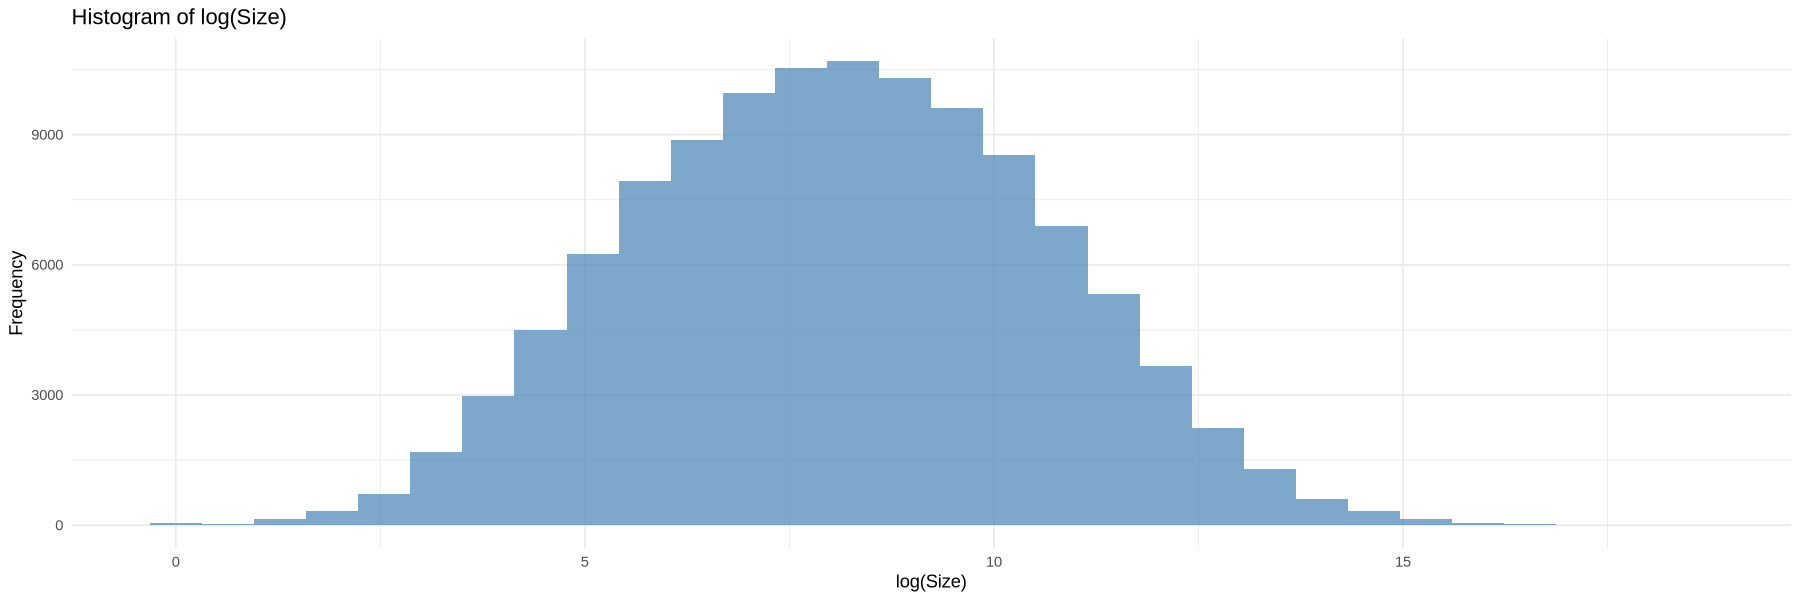

In [4]:
# Main developer: Leen
options(repr.plot.width = 15, repr.plot.height =5) 
p1 <- ggplot(repo, aes(x = log(Size))) +
  geom_histogram(bins = 30, fill = "steelblue", alpha = 0.7) +
  ggtitle("Histogram of log(Size)") +
  xlab("log(Size)") +
  ylab("Frequency") +
  theme_minimal()

p1

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


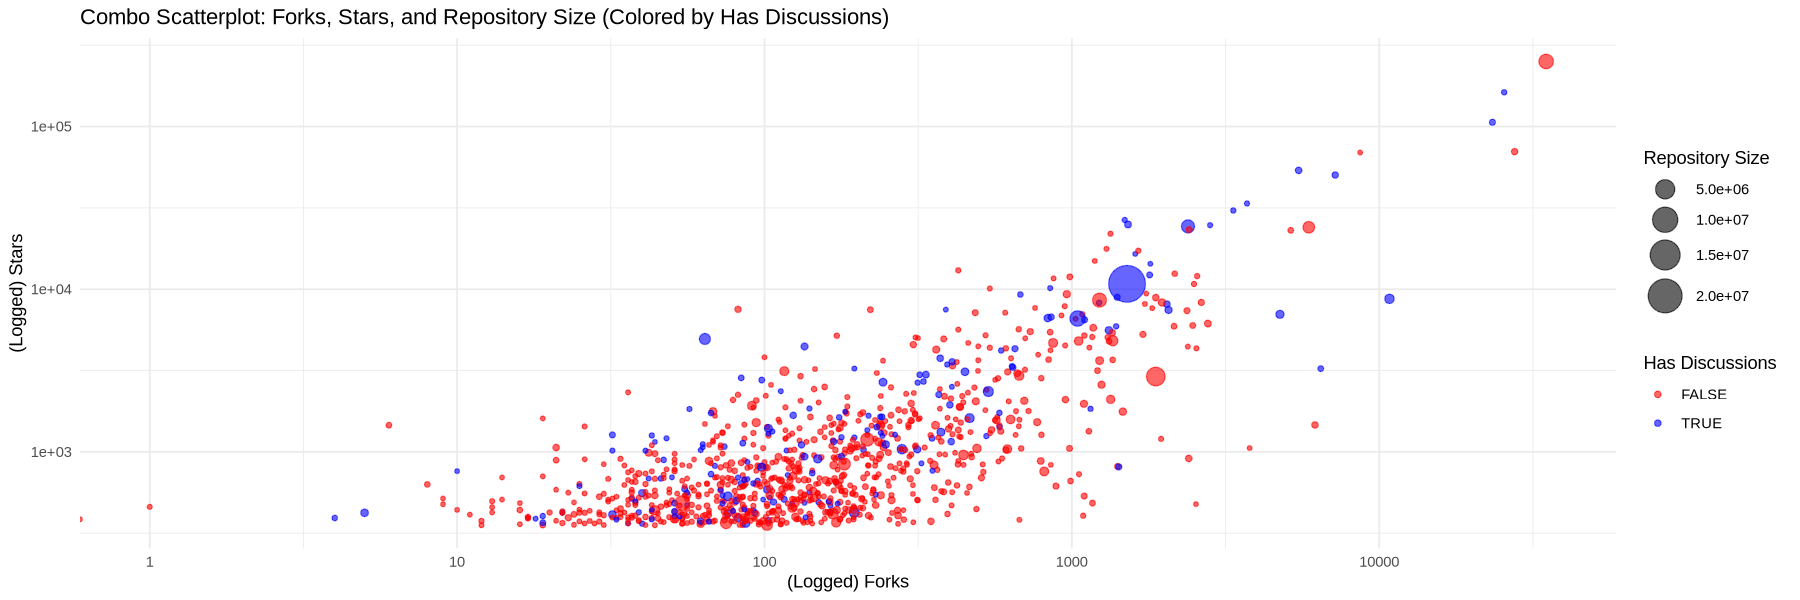

In [5]:
# Main developer: Leen
#plot 2: scatterplot of stars vs forks, point size represents repository size and is colored for has_discussions
p2 <- repo_strat_sample %>%
    ggplot(aes(x = Forks, y = Stars, color = `Has Discussions`, size = Size)) +  
    geom_point(alpha = 0.6) +  # semi transparent points to make it easier to visualize even when overlapping
    scale_size(range = c(1, 10)) +  # adjusting size of the points based on size of repository
    scale_color_manual(values = c("red", "blue")) + 
    labs(title = "Combo Scatterplot: Forks, Stars, and Repository Size (Colored by Has Discussions)",
         x = "(Logged) Forks",
         y = "(Logged) Stars",
         size = "Repository Size",
         color = "Has Discussions") +
    scale_x_log10() +
    scale_y_log10() +
    theme_minimal()

p2

For this combination scatterplot, there seems to be a positive association between (logged) `Forks` and (logged) `Stars`, with repositories having discussions enabled (blue) being more common among those with higher star and fork counts. When examining the sizes of the data points, there doesn’t appear to be a clear pattern based on `Star` levels, suggesting a very weak or nonexistent relationship between (logged) `Stars` and repository `Size`.

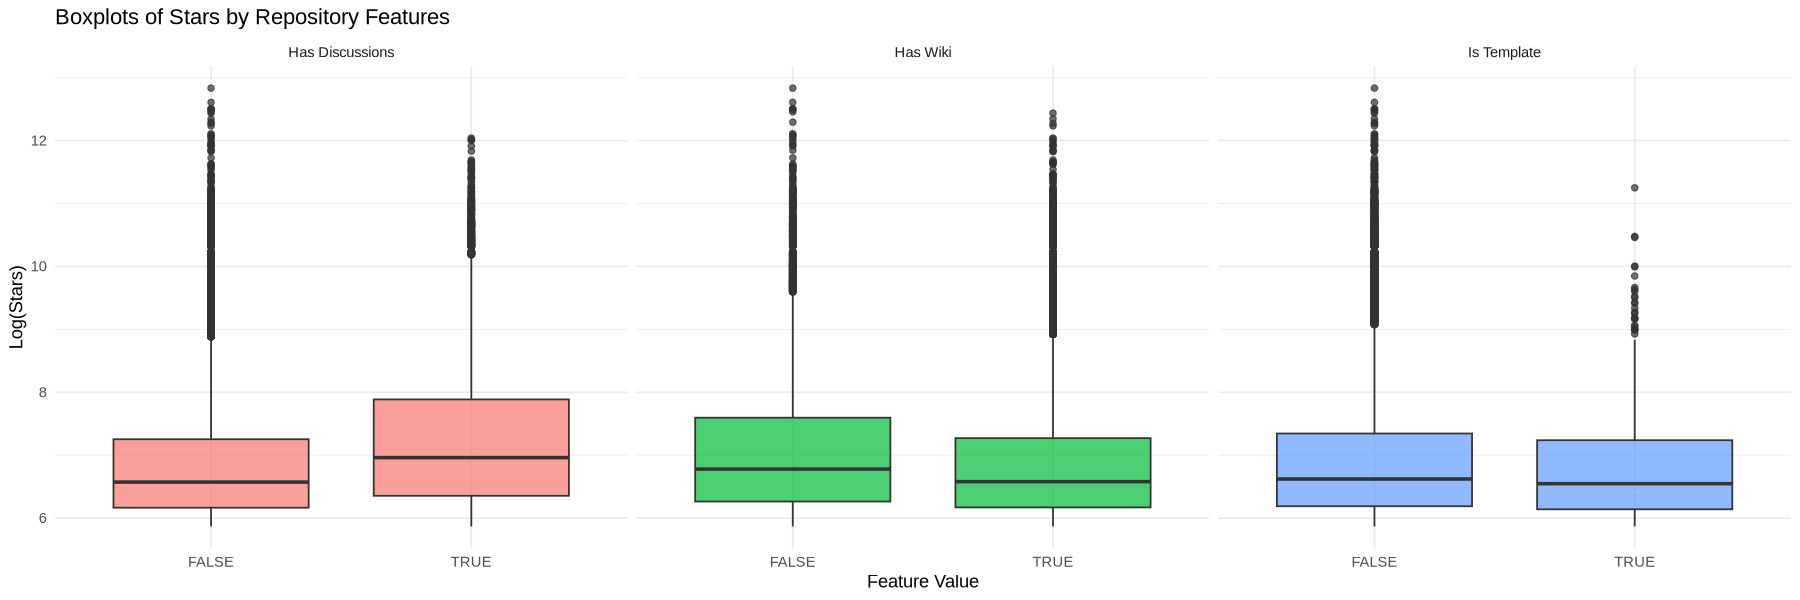

In [6]:
# Main developer: Leen
repositories <- repo %>%
  mutate(across(c(`Has Discussions`, `Has Wiki`, `Is Template`), as.factor))

p3 <- repositories %>%
  pivot_longer(cols = c(`Has Discussions`, `Has Wiki`, `Is Template`),
               names_to = "Variable",
               values_to = "Value") %>%
  ggplot(aes(x = Value, y = log(Stars), fill = Variable)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~ Variable, ncol = 4) +
  labs(title = "Boxplots of Stars by Repository Features",
       x = "Feature Value",
       y = "Log(Stars)") +
  theme_minimal() +
  theme(legend.position = "none")

p3

For the `Has_projects` boxplot, it appears that repositories without projects tend to have a higher average number of stars. Similarly, the `Has_wiki` boxplot suggests that repositories without an associated wiki tend to have a higher average number of stars. Lastly, for the `is_template` boxplot, the number of stars does not vary significantly based on whether a repository is a template, although the average is slightly higher for repositories that are not templates. Overall, none of these differences seem substantial at first glance, which might indicate a lack of a strong relationship between the number of stars and these variables.

In [7]:
# Main developer: Ellie
# Log-transform Stars, Size, Forks, Issues columns, and set 'Has Discussions' as factor
repo_sample_log <- repo_strat_sample %>%
    mutate(Size = log(Size + 1),
          Stars = log(Stars + 1),
           Forks = log(Forks + 1),
           Issues = log(Issues + 1),
          `Has Discussions` = as.factor(`Has Discussions`))
head(repo_sample_log)

Size     Stars    Forks    Issues   Has Projects Has Wiki Has Pages
1 6.971669 7.189168 6.150603 5.365976 TRUE         FALSE     TRUE    
2 8.196437 6.859615 4.983607 4.890349 TRUE          TRUE    FALSE    
3 9.168163 7.069874 5.123964 3.401197 TRUE          TRUE    FALSE    
4 7.130099 6.744059 4.812184 3.713572 TRUE          TRUE    FALSE    
5 8.776630 7.157735 6.016157 3.555348 TRUE          TRUE     TRUE    
6 9.432924 8.551401 5.153292 5.283204 TRUE          TRUE    FALSE    
  Has Discussions Is Template
1 FALSE           FALSE      
2 FALSE           FALSE      
3 FALSE           FALSE      
4 FALSE           FALSE      
5 FALSE           FALSE      
6 FALSE           FALSE

Now, lets take a closer look at our response variable `Stars` after the log transformation for both the sample and the full dataset. With this we can see if our range of values in the sample is representative of the full dataset. 

In [8]:
# Main developer: Macy
# exploration of Stars column in sample
Stars_summary <- as.data.frame(as.list(summary(repo_sample_log$Stars)))
repo_Stars_exploration <- tibble(
    Data = "Sample",
    Min = Stars_summary$Min.,
    Median = Stars_summary$Median,
    Mean = Stars_summary$Mean,
    Max = Stars_summary$Max.,
    SD = sd(repo_sample_log$Stars))

Stars_summary <- as.data.frame(as.list(summary(log(repo$Stars + 1))))
repo_Stars_exploration <- rbind(
        model = repo_Stars_exploration,
        data = tibble(
    Data = "Full Dataset",
    Min = Stars_summary$Min.,
    Median = Stars_summary$Median,
    Mean = Stars_summary$Mean,
    Max = Stars_summary$Max.,
    SD = sd(repo_sample_log$Stars)))

repo_Stars_exploration

Data         Min      Median   Mean     Max      SD       
1 Sample       5.872118 6.622069 6.895690 12.43487 0.9795857
2 Full Dataset 5.869297 6.622736 6.890278 12.83221 0.9795857

We can see that both of these summaries are very similar, barring the slight difference in our max value. This indicates that our stratified sample is representative of our full dataset.

We create a correlation matrix on a heatmap to check for multicollinearity, or linear dependence, among our covariates.

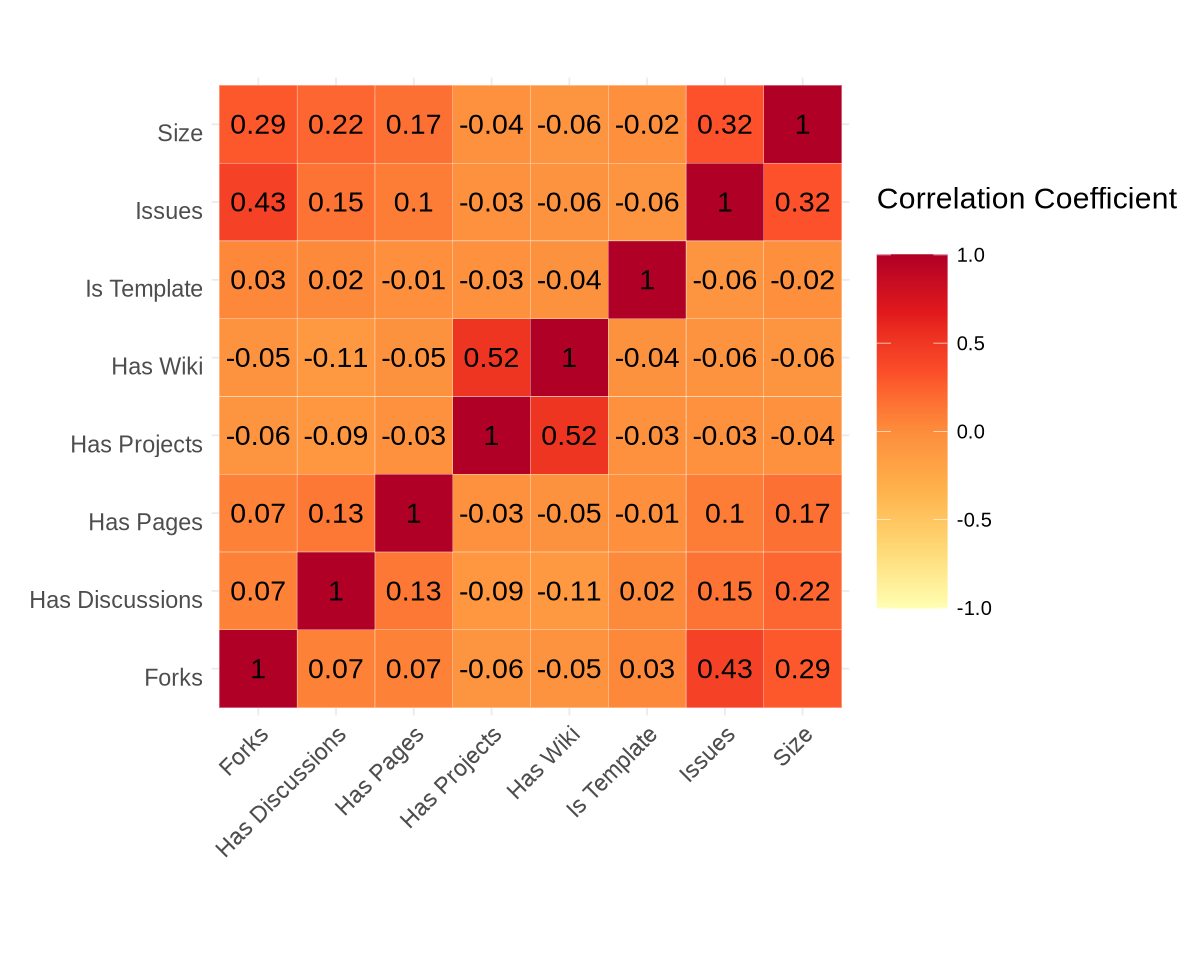

In [9]:
# Main developer: Ellie
options(repr.plot.width = 10, repr.plot.height = 8) 
repo_sample_log_bin <- 
    repo_sample_log %>%
    mutate(across(where(is.logical), as.numeric)) %>%
    mutate(`Has Discussions` = as.numeric(`Has Discussions`))
corr_matrix_repo <-
    repo_sample_log_bin %>%
    select(-Stars) %>%
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
plot_corr_matrix_repo <-
    corr_matrix_repo %>%
    ggplot(mapping = aes(var1, var2)) +
    geom_tile(mapping = aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
    geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_repo

Note that the largest correlation, in magnitude, is between `Has.Wiki` and `Has.Projects`, with a coefficient of 0.57. This is noticeable but not large enough to be cause for concern or to consider dropping either variable.

## b) Methods: Plan

**Overview of model selection method**
<br> We chose forward selection as our method of selecting a reduced model. This approach begins with the intercept-only model and adds covariates one at a time, selecting the best model of each size (i.e. number of covariates) based on the lowest residual sum of squares (RSS). Based on these results we will select the model with the lowest $C_p$ value, which identifies the best predictive model regarding goodness of fit. To evaluate its performance, we will compare this reduced model against a full model (regressing `Stars` on all 7 covariates) using Root Mean Squared Error (RMSE) to analyze the predictive power of the selected covariates and address our research question.

Forward selection is appropriate for this analysis because it is computationally efficient, simple to implement, and adheres to the principle of parsimony, balancing predictive power and interpretability. This aligns with our goal of identifying the subset of covariates that will be most helpful in predicting `Stars` while maintaining interpretability.

However, forward selection has some limitations. It may not find the globally optimal model, especially if certain variables improve predictive power only when included together. Additionally, it focuses on minimizing in-sample error, which may not ensure the model generalizes well to new data. Comparing the RMSE of the reduced and full models will help address this concern.

By applying forward selection and evaluating the resulting model, we aim to identify a reduced model with strong predictive power and interpretability, effectively addressing our research question.


<br> **Addressing key assumptions:**
<br> *(a) No severe multicollinearity*
<br> Earlier we checked for multicollinearity by creating a correlation matrix to identify significant linear associations or dependencies between covariates. We addressed these already.

*(b) Approximately linear relationship*
<br> We assume a roughly linear relationship between response and covariates. Preliminary analysis suggests a fairly linear relationship between `Stars` and `Forks`, supporting this assumption.

*(c) No ommitted key covariates*
<br> All variables excluded from the original dataset were intentionally removed in confidence that they are not relevant predictors for `Stars`.

*(d) Independence of observations*
<br> We assume each repository is distinct and independent from one another.

<br> **Implementation of proposed model**

<br> ***TODO***: walk the reader thorugh the analysis in plain english (using markdown)
<br> ***TODO***: add "main developer" and "contributers" to top of each code cell

We first split our data into a training and testing set, and reorder the columns so `Stars` is first.

In [10]:
# Main developer: Ellie
repo_sample_log <- 
    repo_sample_log %>%
    mutate(id = row_number()) %>%
    select(Stars, everything())

training_repo <-
    repo_sample_log %>%
    slice_sample(prop = 0.7, replace = FALSE)

testing_repo <-
    repo_sample_log %>%
    anti_join(training_repo, by = "id") %>%
    select(-id)

training_repo <- 
    training_repo %>%
    select(-id)
head(training_repo)

Stars    Size      Forks    Issues   Has Projects Has Wiki Has Pages
1 5.968708 10.396078 3.828641 2.079442 FALSE        FALSE     TRUE    
2 6.084499  5.717028 5.648974 1.609438  TRUE         TRUE    FALSE    
3 7.999343 10.014805 5.771441 4.859812 FALSE        FALSE    FALSE    
4 6.517671 11.392158 4.369448 1.791759  TRUE         TRUE    FALSE    
5 7.609367  8.323608 6.095825 0.000000  TRUE         TRUE     TRUE    
6 5.950643  4.543295 5.545177 1.945910  TRUE         TRUE    FALSE    
  Has Discussions Is Template
1 FALSE           FALSE      
2 FALSE           FALSE      
3 TRUE            FALSE      
4 FALSE           FALSE      
5 FALSE           FALSE      
6 FALSE           FALSE

We fit the full model including all covariates. We will use this as a baseline for later comparison.

In [11]:
# Main developer: Ellie
repo_full <- lm(Stars ~., training_repo)
summary(repo_full)


Call:
lm(formula = Stars ~ ., data = training_repo)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94987 -0.41161 -0.05695  0.35942  2.39293 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.375953   0.138483  31.599  < 2e-16 ***
Size                  -0.022473   0.010809  -2.079  0.03799 *  
Forks                  0.542472   0.022072  24.577  < 2e-16 ***
Issues                 0.068390   0.017388   3.933 9.23e-05 ***
`Has Projects`TRUE    -0.227018   0.081762  -2.777  0.00564 ** 
`Has Wiki`TRUE        -0.124964   0.067923  -1.840  0.06623 .  
`Has Pages`TRUE        0.002672   0.059830   0.045  0.96439    
`Has Discussions`TRUE  0.259925   0.065185   3.987 7.39e-05 ***
`Is Template`TRUE     -0.420274   0.229779  -1.829  0.06782 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6418 on 691 degrees of freedom
Multiple R-squared:  0.5841,	Adjusted R-squared:  0.5793 
F-st

We now use this full model to obtain out-of-sample predictions for repos in the testing set.

In [12]:
# Main developer: Ellie
repo_test_pred_full <- predict(repo_full, newdata = testing_repo)
head(repo_test_pred_full)

1        2        3        4        5        6 
6.830152 6.728185 7.336155 8.430893 8.097018 7.482178

Compute the Root Mean Squared Error (RMSE) in order to evaluate the full predictive model.

In [13]:
# Main developer: Ellie
# Contributor: Macy
repo_RMSE_models <- tibble(
    Model = "Full Regression",
    RMSE = rmse(model = repo_full,
                data = testing_repo),
    Adj.R2 = summary(repo_full)$adj.r.squared)

repo_RMSE_models

Model           RMSE      Adj.R2   
1 Full Regression 0.6871572 0.5792508

Use forward selection to select a reduced linear regression model.

In [14]:
# Main developer: Ellie
repo_forward_selection <- leaps::regsubsets(
    x = Stars ~., nvmax = 8,
    data = training_repo,
    method = "forward")

repo_forward_summary <- summary(repo_forward_selection)
repo_forward_summary <- tibble(
    n_input_variables = 1:8,
    RSS = repo_forward_summary$rss,
    BIC = repo_forward_summary$bic,
    Cp = repo_forward_summary$cp)
summary(repo_forward_selection)
repo_forward_summary

Subset selection object
Call: regsubsets.formula(x = Stars ~ ., nvmax = 8, data = training_repo, 
    method = "forward")
8 Variables  (and intercept)
                      Forced in Forced out
Size                      FALSE      FALSE
Forks                     FALSE      FALSE
Issues                    FALSE      FALSE
`Has Projects`TRUE        FALSE      FALSE
`Has Wiki`TRUE            FALSE      FALSE
`Has Pages`TRUE           FALSE      FALSE
`Has Discussions`TRUE     FALSE      FALSE
`Is Template`TRUE         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         Size Forks Issues `Has Projects`TRUE `Has Wiki`TRUE `Has Pages`TRUE
1  ( 1 ) " "  "*"   " "    " "                " "            " "            
2  ( 1 ) " "  "*"   " "    " "                " "            " "            
3  ( 1 ) " "  "*"   " "    "*"                " "            " "            
4  ( 1 ) " "  "*"   "*"    "*"                " "            " "            
5  ( 1 ) "*"  "*"

n_input_variables RSS      BIC       Cp       
1 1                 310.7783 -539.5106 58.399717
2 2                 301.3352 -554.5593 37.476836
3 3                 294.7248 -563.5349 23.430567
4 4                 288.9587 -570.8148 11.433473
5 5                 287.2689 -568.3692  9.331549
6 6                 286.0390 -564.8215  8.346077
7 7                 284.6614 -561.6499  7.001994
8 8                 284.6605 -555.1008  9.000000

Visualize the Mallow's Cp statistics of these models.

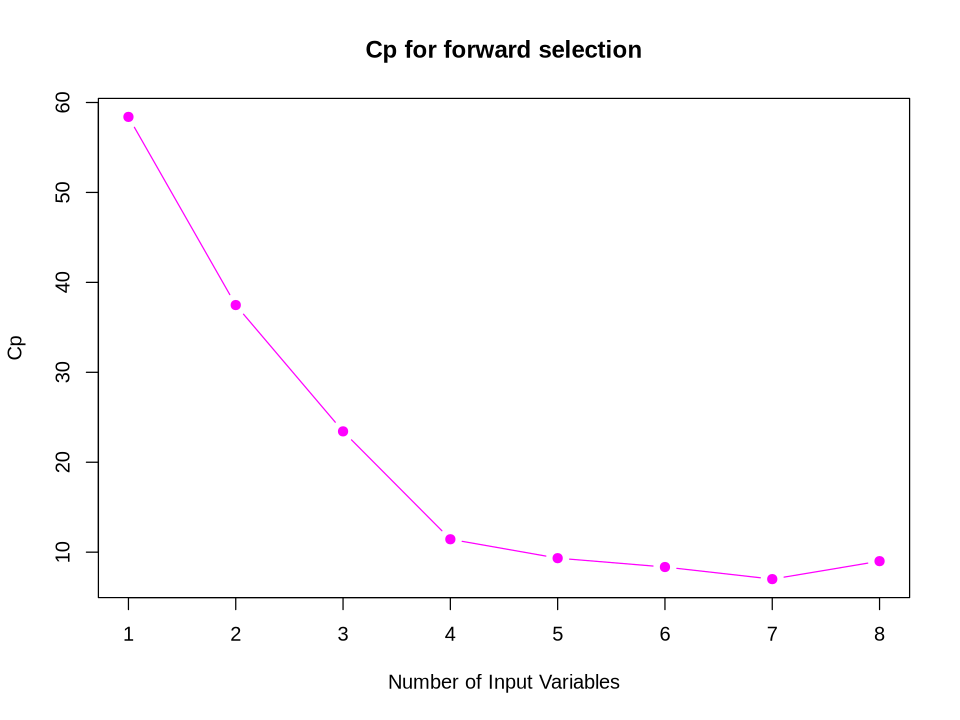

In [15]:
# Main developer: Ellie
options(repr.plot.width = 8, repr.plot.height = 6) 
plot(summary(repo_forward_selection)$cp,
     main = "Cp for forward selection",
     xlab = "Number of Input Variables", 
     ylab = "Cp",
     type = "b",
     pch = 19,
     col = "magenta"
)

We select the model with the lowest Cp value.

In [16]:
# Main developer: Ellie
repo_selection_summary <- summary(repo_forward_selection)
cp_min = which.min(repo_selection_summary$cp)
variables = repo_selection_summary$which[cp_min, ]
repo_reduced = lm(Stars ~ ., data = training_repo[variables])
summary(repo_reduced)


Call:
lm(formula = Stars ~ ., data = training_repo[variables])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95035 -0.41199 -0.05727  0.35974  2.39464 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.37590    0.13838  31.623  < 2e-16 ***
Size                  -0.02241    0.01070  -2.094  0.03660 *  
Forks                  0.54248    0.02206  24.595  < 2e-16 ***
Issues                 0.06840    0.01737   3.937 9.10e-05 ***
`Has Projects`TRUE    -0.22698    0.08170  -2.778  0.00561 ** 
`Has Wiki`TRUE        -0.12501    0.06787  -1.842  0.06589 .  
`Has Discussions`TRUE  0.26016    0.06493   4.007 6.82e-05 ***
`Is Template`TRUE     -0.42017    0.22960  -1.830  0.06768 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6414 on 692 degrees of freedom
Multiple R-squared:  0.5841,	Adjusted R-squared:  0.5799 
F-statistic: 138.8 on 7 and 692 DF,  p-value: < 2.2e-16


Compare the RMSE of our selected reduced model with that of the full (baseline) model.

In [17]:
# Main developer: Ellie
# Contributor: Macy
repo_RMSE_models_compare <-
    rbind(
        model = repo_RMSE_models,
        data = tibble(Model = "Reduced Regression",
                      RMSE = rmse(model = repo_reduced,
                                  data = testing_repo),
                     Adj.R2 = summary(repo_reduced)$adj.r.squared))

repo_RMSE_models_compare
# Print names of selected covariates
selected_var <- names(coef(repo_forward_selection, cp_min))[-1]
selected_var

Model              RMSE      Adj.R2   
1 Full Regression    0.6871572 0.5792508
2 Reduced Regression 0.6872216 0.5798576

[1] "Size"                  "Forks"                 "Issues"               
[4] "`Has Projects`TRUE"    "`Has Wiki`TRUE"        "`Has Discussions`TRUE"
[7] "`Is Template`TRUE"

**Interpretation of results**
<br> The table above shows that the Root Mean Squared Error of our reduced model, selected using forward selection and containing 4 covariates, is slightly lower than that of the full model containing all 7 covariates. This suggests that our reduced model has similar prediction performance compared with the full model. The Adjusted $R^2$ is also extreamly similar between the two models at apporximately 53%. This similarity between our full and reduced models suggests that only one or two of the variables used are responsible for most of our predictive power.

This is supported by the looking at our previous summaries for the full and reduced models where only the `Intercept`, `Forks`, and `Has.Discussions` have $p$ values that are statistcally significant.

# Discussion

In the previous sections we computed and analysed our reduced model obtained via forward selection and found that it utilizes 4 out of the 7 variables we included in our analysis. This reduced model and our full model both had Root Mean Squared Error's of approximately 0.7, with the reduced model having a slightly lower RMSE of 0.698 and extremely similar $R^2$ of 53%. This has some implications for research questions, which are as follows:

#### <br> Research questions:
1) Which fundamental characteristics of a repository influence its popularity? 
2) Can these fundamental characteristics effectively predict the popularity of a repository?


##### <br> Research Question 1)
In regards to the first question, we noticed during our interpretation of results that in both the full and reduced models only `Forks` and `Has.Discussions` are ever statistically significant. This implies that most of our predictive power originates from these two variables, and that the other variables have a minimal effect on our predictive power. This is supported by the small difference in reduced and full model RMSE's and $R^2$. In this way, we can tentatively  conclude that `Forks` and `Has.Discussions` are fundamental characteristics of a repository that can influence its popularity.

This conclusion is further supported by existing literature  (Hudson Borges, 2016; Junxiao Han, 2019), both of which found that `Forks` exhibits a strong positive correlation to `Stars`.

Our conclusion for this research question is about what we expected after looking into the existing research, especially in terms of `Forks`. The significance of `Has.Discussions` was outside our expectations, but it isn't surprising.


##### <br> Research Question 2)
As for our second research question, it depends on if we are aiming to predict `Stars` accurately or if we are looking for predictions of general trends in repository popularity. Recall from our Exploratory Data Analysis that our values vary between a minimum  of 5.124 and a maximum of 11.574. This is a range of 6.45. We can use this to normalize our RMSE, which results in an approximate 10.9% average error relative to our range. 

This is not a particularly flattering assessment of our model's accuracy. If the intention of use behind this model is to accurately predict `Stars`, then this model doesn't effectively predict the popularity of a repository using fundamental characteristics. On the other hand, if our intention is to use this model to predict general trends in repository popularity, it is sufficient. 

Keeping in mind that just because our model isn’t accurate doesn’t mean that a more sophisticated model won’t be accurate, we can't come to a conclusive answer for our second research question. While this isn’t what we hoped to find, it isn’t very surprising either.

#### <br> Improvements
On that note, there are some improvements we could consider for the future. One is fine-tuning how we transform continuous variables via logs to achieve more linear relationships. While the logarithmic transformations we used are common for this purpose, they don’t always guarantee perfectly linear data. Further reports could explore using different transformations.

Another improvement we could make is to increase the amount of variables we use in our full model before performing forward selection. 

#### <br> Future Questions

Some future question this report could lead to include:

- Why are `Forks` and `Has.Discussions` strong predictors of `Stars`?
- What methods can be used to achieve accurate predictions of `Stars` using the fundamental characteristics of a repository?
- Can a reduced model with only one or two variables achieve accurate predictions for `Stars`?

# References

1) Hudson Borges, Andre Hora, and Marco Tulio Valente. (2016). Predicting the Popularity of GitHub Repositories. ASERG Group, Department of Computer Science (DCC), Federal University of Minas Gerais (UFMG), Brazil. ⃝c 2016 ACM. ISBN 978-1-4503-2138-9.
2) Junxiao Han, Shuiguang Deng, Xin Xia, Dongjing Wang, and Jianwei Yin. (2019). Characterization and Prediction of Popular Projects on GitHub. Proceedings of the 2019 IEEE 43rd Annual Computer Software and Applications Conference (COMPSAC). Zhejiang University, Monash University, and Hangzhou Dianzi University.

***TODO:*** Add table and figure numbers once we have all of our figures in